In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.add("s")
stop_words.add("th")
stop_words.add("nd")
stop_words.add("rd")
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')#changing words to the core word they were derived from having same meaning as otherwise they will be given different tokens resulting 
lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud
from sklearn.metrics import classification_report
import tensorflow as tf
import scipy
from collections import Counter
!pip install emoji
import emoji

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
df=pd.read_csv('Train_suicide1.csv',encoding='windows-1252')

In [13]:
df

,Tweet,Suicide
0,i hate myself so much i want to KILL myself ho...,Potential Suicide post
1,RT @DrugForumsBest: I woke up with a bag over ...,Potential Suicide post
2,i wanna fucking kill myself,Potential Suicide post
3,why do i destroy all my opportunities? am i go...,Potential Suicide post
4,u - understand what the fuck im doing wrong wi...,Potential Suicide post
...,...,...
1594,hi! just joined and i think it's brill! haha s...,Not Suicide post
1595,@WilliamSledd Love the videos William New to t...,Not Suicide post
1596,@itsanimesh I got an Openmoko FreeRunner and n...,Not Suicide post
1597,@PeoplemapsJulie I am looking for the berocca ...,Not Suicide post


In [14]:
df=df.dropna()

In [15]:
df.isna().sum()

Tweet      0
Suicide    0
dtype: int64

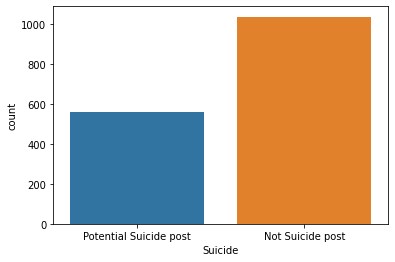

In [16]:
sns.countplot(x="Suicide", data=df)

In [17]:
#as we can see the dataset is imbalanced, to resolve this we are going to make the number of entries for each label euqal to one aother

In [18]:
df["Suicide"].unique()

array(['Potential Suicide post', 'Not Suicide post'], dtype=object)

In [19]:
suicidal=df[df["Suicide"]=="Potential Suicide post "]
not_suicidal=df[df["Suicide"]=="Not Suicide post"]

In [20]:
print("number of suicidal tweets = "+str(len(suicidal)))

number of suicidal tweets = 0


In [21]:
print("number of non suicidal tweets = "+str(len(not_suicidal)))

number of non suicidal tweets = 1038


In [22]:
not_suicidal=not_suicidal.sample(frac=1).reset_index(drop=True)
not_suicidal=not_suicidal[:559]

In [23]:
dataset=suicidal.append(not_suicidal,ignore_index=True)

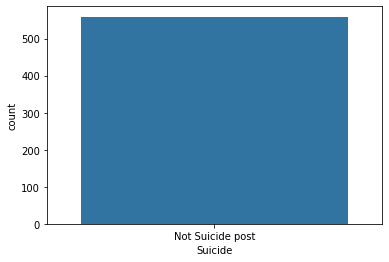

In [24]:
sns.countplot(x="Suicide", data=dataset)

In [25]:
dataset=dataset.sample(frac=1).reset_index(drop=True)

In [26]:
dataset

,Tweet,Suicide
0,@alancostello Thats on GH3! Send it later?? si...,Not Suicide post
1,@LukesMummy He was a very good boy. He looks e...,Not Suicide post
2,@photojunkie I thought it said &quot;looking t...,Not Suicide post
3,wants something to eat but cant decide what to...,Not Suicide post
4,#cloudforce is the top trend. I am surprised. ...,Not Suicide post
...,...,...
554,Paxton fans keep up the good work ! This young...,Not Suicide post
555,RT @MileyCyrus: Completely devestated by the f...,Not Suicide post
556,@REGYATES Nice pictures! Glad your having a go...,Not Suicide post
557,When my Bottle Pop Shake me!..,Not Suicide post


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    559 non-null    object
 1   Suicide  559 non-null    object
dtypes: object(2)
memory usage: 8.9+ KB


In [28]:
#preprocessing the dataset

In [29]:
def pre(text):
 text=re.sub("RT", "", text)#remove RT
 text=re.sub("#([a-zA-Z0-9_]+)",' ',text)#remove hash tag
 text=re.sub("@[A-Za-z0-9_]+"," ", text)#remove mention
 text=emoji.demojize(text, delimiters=(" ", " "))#replace emoji with text
 text=re.sub("_",' ',text)
 text=text.lower()#lowercase
 text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)#remove website
 text=re.sub(":", " ", text)
 text=re.sub(r'[\w\.-]+@[\w\.-]+','',text)#remove email
 text=re.sub(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*','', text) #remove special charactors 
 text=re.sub(r'[^a-zA-Z\s]', ' ', text)#keep only text
 text=text.split()#tokenizing text
 text=str([word for word in (text) if not word in stop_words])#remove stopwords
 text=" ".join([lemmatizer.lemmatize(word) for word in text.split()])#lemmatize
 return text

In [30]:
processed=[]
for i in dataset['Tweet']:
  processed.append(pre(i))

In [31]:
dataset["pre"]=processed

In [32]:
dataset

,Tweet,Suicide,pre
0,@alancostello Thats on GH3! Send it later?? si...,Not Suicide post,"['thats', 'gh', 'send', 'later', 'since', 'com..."
1,@LukesMummy He was a very good boy. He looks e...,Not Suicide post,"['good', 'boy', 'looks', 'even', 'cuter', 'thi..."
2,@photojunkie I thought it said &quot;looking t...,Not Suicide post,"['thought', 'said', 'quotlooking', 'get', 'sho..."
3,wants something to eat but cant decide what to...,Not Suicide post,"['wants', 'something', 'eat', 'cant', 'decide'..."
4,#cloudforce is the top trend. I am surprised. ...,Not Suicide post,"['top', 'trend', 'surprised', 'couldnt', 'loved']"
...,...,...,...
554,Paxton fans keep up the good work ! This young...,Not Suicide post,"['paxton', 'fans', 'keep', 'good', 'work', 'yo..."
555,RT @MileyCyrus: Completely devestated by the f...,Not Suicide post,"['completely', 'devestated', 'fires', 'affecti..."
556,@REGYATES Nice pictures! Glad your having a go...,Not Suicide post,"['nice', 'pictures', 'glad', 'good', 'time']"
557,When my Bottle Pop Shake me!..,Not Suicide post,"['bottle', 'pop', 'shake']"


In [33]:
#Visulization

In [34]:
data=dataset[dataset.Suicide == 'Not Suicide post']['pre']
bag = []
string=str()
for j in list(data):
  for i in j:
   if i>='a' and i<='z':
     string=str(string)+i
   elif len(string)>0:
     bag.append(string)
     string=str()

com = Counter(((bag)))
com = com.most_common(1000)
com = list(dict(com).keys())

In [35]:
print("Top 10 non suidical words \n"+str(com[:10]))

Top 10 non suidical words 
['good', 'im', 'day', 'like', 'today', 'amp', 'love', 'time', 'get', 'going']


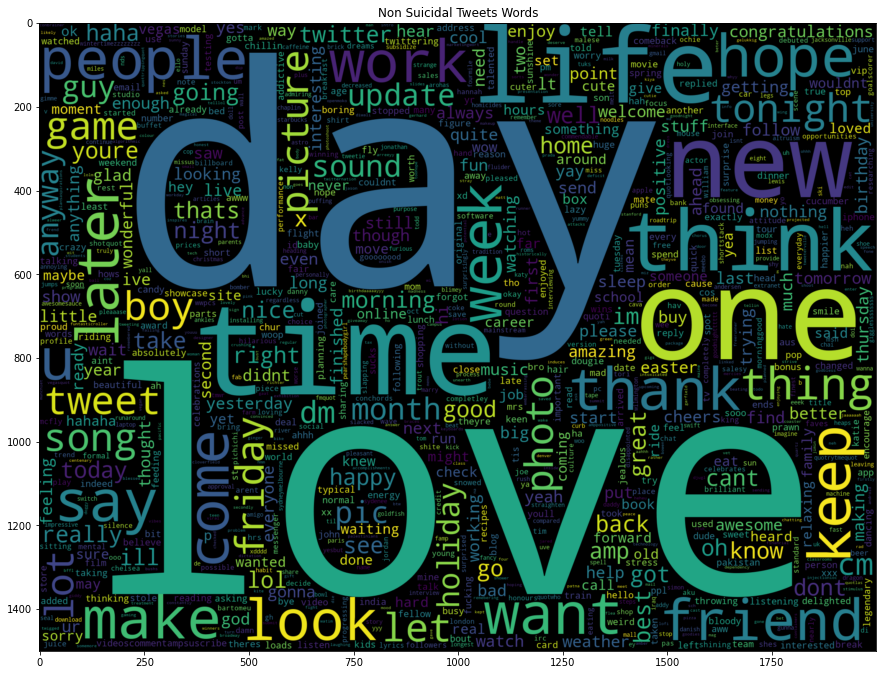

In [36]:
plt.figure(figsize = (15,20)) 
plt.title("Non Suicidal Tweets Words")
wc = WordCloud(max_words = 1000, width = 2000 , height = 1500).generate(" ".join((com)))
plt.imshow(wc , interpolation = 'bilinear')

In [37]:
data=dataset[dataset.Suicide == 'Potential Suicide post ']['pre']
bag = []
string=str()
for j in list(data):
  for i in j:
   if i>='a' and i<='z':
     string=str(string)+i
   elif len(string)>0:
     bag.append(string)
     string=str()

com = Counter(((bag)))
com = com.most_common(1000)
com = list(dict(com).keys())

In [56]:
print("Top 10 suidical words \n"+str(com[:10]))

Top 10 suidical words 
[]


ValueError: ignored

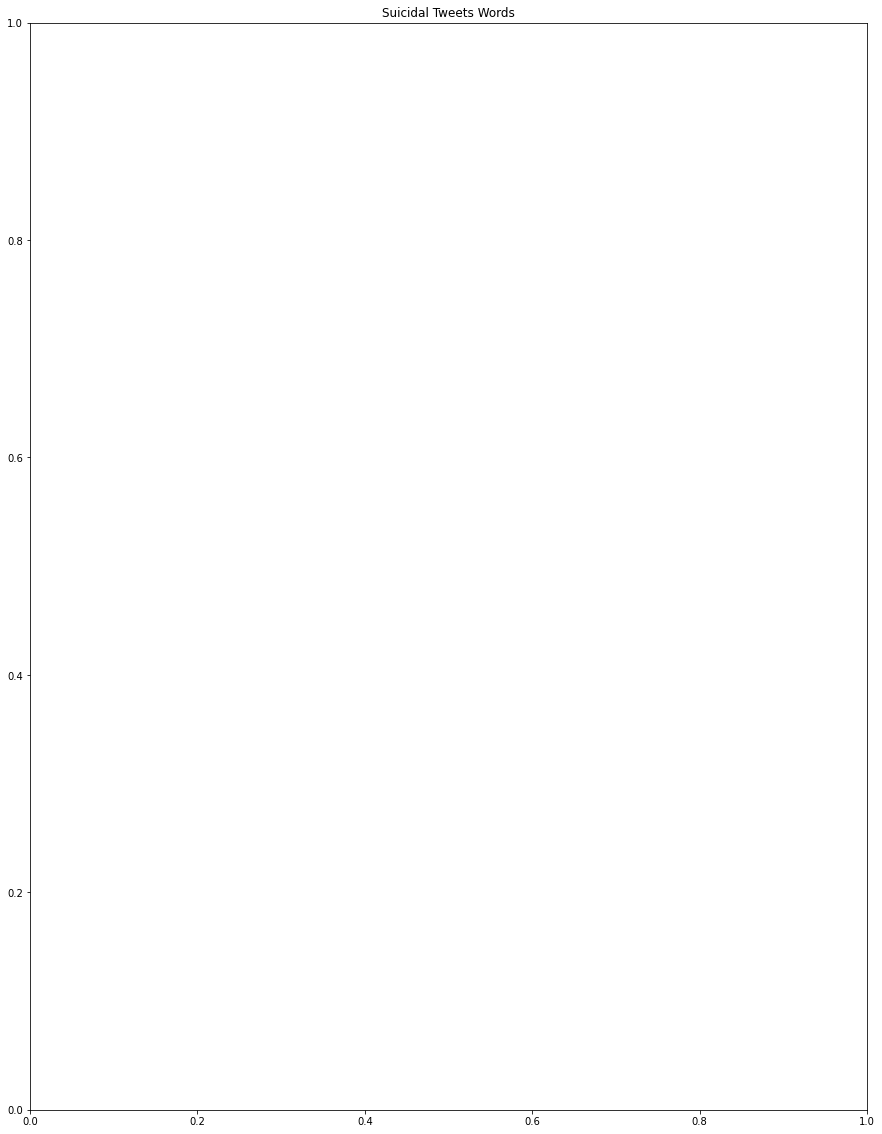

In [39]:
plt.figure(figsize = (15,20)) 
plt.title("Suicidal Tweets Words")
wc = WordCloud(max_words = 1000, width = 2000 , height = 1500).generate(" ".join((com)))
plt.imshow(wc , interpolation = 'bilinear')

In [40]:
dataset['Suicide'].unique()

array(['Not Suicide post'], dtype=object)

In [41]:
for i in range(dataset.shape[0]):
  if dataset["Suicide"].iloc[i]=='Not Suicide post':
    dataset["Suicide"].iloc[i]=0
  else:
    dataset["Suicide"].iloc[i]=1
dataset["Suicide"]=np.array(dataset['Suicide']).astype(int)

In [42]:
#Vectorizing text

In [43]:
X=dataset['pre']
y=dataset['Suicide']
vectorizer =TfidfVectorizer()
vectorizer.fit(X)

TfidfVectorizer()

In [44]:
x=vectorizer.transform(X)

In [45]:
#Train test split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=100)

In [47]:
labels=["Not Suicide","Suicide"]

In [48]:
#testing different models

In [49]:
#machine learning

In [51]:
#Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_depth=40, random_state=0)
RFC.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, random_state=0)

In [54]:
y_pred = RFC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168



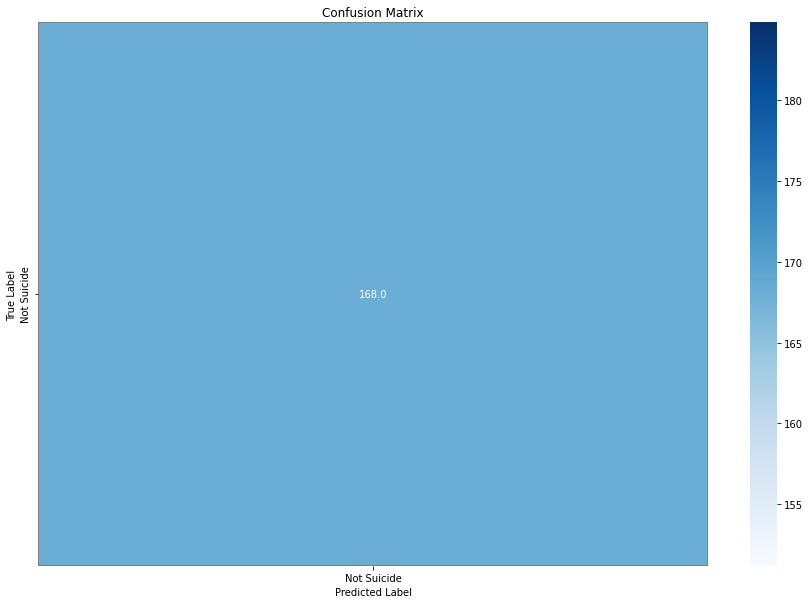

In [55]:
confusion_mtx = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train,y_train)

In [ ]:
y_pred = KNN.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
confusion_mtx = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=1)
DTC.fit(X_train,y_train)

In [ ]:
y_pred = DTC.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
confusion_mtx = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#deep learning

In [ ]:
#preparing testing and training data

In [ ]:
from sklearn.model_selection import train_test_split
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(list(X), np.array(y), test_size=0.30, random_state=100)

In [ ]:
vocab_size = 50000
embedding_dim = 50
max_length = 500
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train_dl)

word_index = tokenizer.word_index

x_train_sequ = tokenizer.texts_to_sequences(X_train_dl)
training_padded = tf.keras.preprocessing.sequence.pad_sequences(x_train_sequ, maxlen=max_length, padding=padding_type, truncating=trunc_type)
training_padded = np.array(training_padded)

x_test_sequ = tokenizer.texts_to_sequences(X_test_dl)
testing_padded = tf.keras.preprocessing.sequence.pad_sequences(x_test_sequ, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded = np.array(testing_padded)

In [ ]:
#DNN

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model1, to_file='model_plot.png', show_shapes= True, show_layer_names=True)

In [ ]:
history = model1.fit(training_padded, y_train_dl, epochs=50, validation_data=(testing_padded, y_test_dl))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
axes[0].plot(history.history['loss'],label="loss")
axes[0].plot(history.history['val_loss'],label="val loss")
axes[0].legend()
axes[1].plot(history.history['accuracy'],label="accuracy")
axes[1].plot(history.history['val_accuracy'],label="val accuracy")
axes[1].legend()

In [ ]:
y_pred = model1.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(np.array(y_test_dl),y_pred))
confusion_mtx = confusion_matrix(np.array(y_test_dl),y_pred)
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Conv_Lstm 

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(6,12, activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(13, dropout=0.2, recurrent_dropout=0.2)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model2, to_file='model2_plot.png', show_shapes= True, show_layer_names=True)

In [ ]:
history = model2.fit(training_padded, y_train_dl, epochs=15, validation_data=(testing_padded, y_test_dl), verbose=2)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
axes[0].plot(history.history['loss'],label="loss")
axes[0].plot(history.history['val_loss'],label="val loss")
axes[0].legend()
axes[1].plot(history.history['accuracy'],label="accuracy")
axes[1].plot(history.history['val_accuracy'],label="val accuracy")
axes[1].legend()

In [ ]:
y_pred = model2.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(np.array(y_test_dl),y_pred))
confusion_mtx = confusion_matrix(np.array(y_test_dl),y_pred)
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#RNN

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(6, dropout=0.2, recurrent_dropout=0.2)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])
model3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model3.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model3, to_file='model_plot3.png', show_shapes= True, show_layer_names=True)

In [ ]:
history = model3.fit(training_padded, y_train_dl, epochs=5, validation_data=(testing_padded, y_test_dl))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
axes[0].plot(history.history['loss'],label="loss")
axes[0].plot(history.history['val_loss'],label="val loss")
axes[0].legend()
axes[1].plot(history.history['accuracy'],label="accuracy")
axes[1].plot(history.history['val_accuracy'],label="val accuracy")
axes[1].legend()

In [ ]:
y_pred = model3.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(np.array(y_test_dl),y_pred))
confusion_mtx = confusion_matrix(np.array(y_test_dl),y_pred)
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#test model with data from other dataset

In [ ]:
test=pd.read_csv("twitter-suicidal_data.csv")
test=test.dropna()
processed_test=[]
for i in test['tweet']:
  processed_test.append(pre(i))
test["pre"]=processed_test

X_val_dl=test['pre']
y_val=test['intention']
X_val=vectorizer.transform(X_val_dl)

In [ ]:
#ml models

In [ ]:
#random forest

In [ ]:
y_pred = RFC.predict(X_val)
print(classification_report(y_val,y_pred))
confusion_mtx = confusion_matrix(y_val,y_pred)
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#knn

In [ ]:
y_pred = KNN.predict(X_val)
print(classification_report(y_val,y_pred))
confusion_mtx = confusion_matrix(y_val,y_pred)
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#decision tree

In [ ]:
y_pred = DTC.predict(X_val)
print(classification_report(y_val,y_pred))
confusion_mtx = confusion_matrix(y_val,y_pred)
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#dl models

In [ ]:
#dnn

In [ ]:
val_data = tokenizer.texts_to_sequences(list(X_val_dl))
val_data = tf.keras.preprocessing.sequence.pad_sequences(val_data, maxlen=max_length, padding=padding_type, truncating=trunc_type)
y_pred = model1.predict(val_data)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(np.array(y_val),y_pred))
confusion_mtx = confusion_matrix(np.array(y_val),y_pred)
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#convLstm

In [ ]:
val_data = tokenizer.texts_to_sequences(list(X_val_dl))
val_data = tf.keras.preprocessing.sequence.pad_sequences(val_data, maxlen=max_length, padding=padding_type, truncating=trunc_type)
y_pred = model2.predict(val_data)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(np.array(y_val),y_pred))
confusion_mtx = confusion_matrix(np.array(y_val),y_pred)
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#RNN

In [ ]:
val_data = tokenizer.texts_to_sequences(list(X_val_dl))
val_data = tf.keras.preprocessing.sequence.pad_sequences(val_data, maxlen=max_length, padding=padding_type, truncating=trunc_type)
y_pred = model3.predict(val_data)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(np.array(y_val),y_pred))
confusion_mtx = confusion_matrix(np.array(y_val),y_pred)
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#test sentences

In [ ]:
labels

In [ ]:
#"RFC"

In [ ]:
a=(pre("I want a vacaction"))
val_data=vectorizer.transform([(' '.join(eval(a)))])
y_pred = RFC.predict(val_data)
print("text is similar to text witht he label = "+labels[y_pred[0]])

In [ ]:
a=(pre("Took all my pills, be dead soon, bye-bye everyone"))
val_data=vectorizer.transform([(' '.join(eval(a)))])
y_pred = RFC.predict(val_data)
print("text is similar to text witht he label = "+labels[y_pred[0]])

In [ ]:
#"DNN"

In [ ]:
val=pd.DataFrame()
val["text"]=["I lovw Arsenal"]
val["pre"]=pre(val["text"][0])
test = tokenizer.texts_to_sequences(list(val["pre"]))
test = tf.keras.preprocessing.sequence.pad_sequences(test, maxlen=max_length, padding=padding_type, truncating=trunc_type)
y_pred = model1.predict(test)
y_pred = np.argmax(y_pred, axis=1)
print("text is similar to text witht he label = "+labels[y_pred[0]])

In [ ]:
val=pd.DataFrame()
val["text"]=["Took all my pills, be dead soon, bye bye everyone."]
val["pre"]=pre(val["text"][0])
test = tokenizer.texts_to_sequences(list(val["pre"]))
test = tf.keras.preprocessing.sequence.pad_sequences(test, maxlen=max_length, padding=padding_type, truncating=trunc_type)
y_pred = model1.predict(test)
y_pred = np.argmax(y_pred, axis=1)
print("text is similar to text witht he label = "+labels[y_pred[0]])